<a href="https://colab.research.google.com/github/Radha54/Taxi-trip-time-Prediction/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

# Mounting of GOOGLE drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading of DATA from Google drive

In [ ]:
trip_df = pd.read_csv("/content/drive/My Drive/NYC Taxi Trip Time Prediction - Radha/NYC Taxi Data.csv")

## <B> Data Profiling and Cleansing </B>
# <h6>In this process we will perform examining, analyzing and cleaning of the Dataset and thereby create useful summaries from the data </h6>

In [ ]:
trip_df.shape

(1458644, 11)

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Observations:
1. There are total 11 columns present in this dataset
2. There are int64(3), object(4) and float64(4) datatypes are present.
By analysing data and corresponding data types it is found that all datas are availiable in correct dtype.

In [ ]:
trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
trip_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# <B> OBSERVATION : </B> <h6>
(A) Vendor id has a minimum value = 1 and a maximum value = 2, We can say that there are two vendor ids 1 and 2.

(B) Passenger_count has a minimum value = 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

(C) The minimum trip_duration is quite low.
 

In [ ]:
trip_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# <B> OBSERVATION : </B> No null value

In [ ]:
trip_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

# <B> OBSERVATION: </B> <h6>
(A) id has 1458644 unique values i.e. number of rows in our dataset.

(B) There are 2 unique vendor_id & 10 unique passenger_count.

(C) There are 2 unique values for store_and_fwd_flag i.e. Y and N.
 

In [ ]:
trip_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# <B> <Center> EDA on Dataset

In [ ]:
# Converting datetime into Integer
trip_df['pickup_datetime']=pd.to_datetime(trip_df['pickup_datetime'])
trip_df['dropoff_datetime']=pd.to_datetime(trip_df['dropoff_datetime'])

In [ ]:
# pickup_day and dropoff_day which will contain the name of the day on which the ride was taken. 
trip_df['pickup_day']=trip_df['pickup_datetime'].dt.day_name()
trip_df['dropoff_day']=trip_df['dropoff_datetime'].dt.day_name()

# pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
trip_df['pickup_day_no']=trip_df['pickup_datetime'].dt.weekday
trip_df['dropoff_day_no']=trip_df['dropoff_datetime'].dt.weekday

# pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
trip_df['pickup_hour']=trip_df['pickup_datetime'].dt.hour
trip_df['dropoff_hour']=trip_df['dropoff_datetime'].dt.hour

# pickup_month and dropoff_month with month number with January=1 and December=12.
trip_df['pickup_month']=trip_df['pickup_datetime'].dt.month
trip_df['dropoff_month']=trip_df['dropoff_datetime'].dt.month

In [ ]:
# Defining the function which tells Morning, Afternoon, Evening and late Night of a day
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
# pickup_timeofday and dropoff_timeofday tells day time
trip_df['pickup_datetime']=trip_df['pickup_hour'].apply(time_of_day)
trip_df['dropoff_datetime']=trip_df['dropoff_hour'].apply(time_of_day)

In [ ]:
from geopy.distance import great_circle

# Function tells the distance travelled by the customer using lattitue and longitude of pickup, drop off.
def cal_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
 
 start_coordinates=(pickup_latitude,pickup_longitude)
 stop_coordinates=(dropoff_latitude,dropoff_longitude)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
# Finally calculated Distance using cal_distance function
trip_df['distance'] = trip_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)
trip_df['distance']

0          1.498523
1          1.805510
2          6.385108
3          1.485501
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: distance, Length: 1458644, dtype: float64

# <B> Graphical representation of Trip Duration

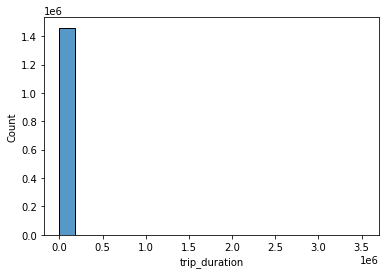

In [ ]:
sns.histplot(trip_df['trip_duration'],kde=False,bins=20)

In [ ]:
trip_df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
# Calclating 0-100th percentille to find a correct percentile value for removal of outliers.
for i in range(0,100,10):
  duration= trip_df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
# The 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier. Hence removing these would be a better idea.
# Let's expand from 90th percentile to 100th percentile as to look further for the 99th percentile.
for i in range(90,100):
  duration= trip_df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [ ]:
# Counting the pessenger in each trip
trip_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

# <B> OBSERVATION : </B>

(A) There are 60 trips with even 0 passenger count.

(B) There is only 1 trip each for 8 and 9 passengers.

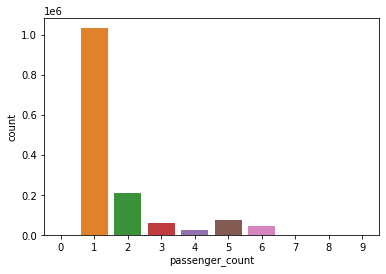

In [ ]:
sns.countplot(x='passenger_count',data=trip_df)

# <B> OBSERVATION : </B>

(A) Maximum no. of passenger in Trip-1


# <B> <U> <Center> STORE AND FORWARD FLAG

In [ ]:
trip_df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994485
Y    0.005515
Name: store_and_fwd_flag, dtype: float64

<Figure size 720x360 with 0 Axes>

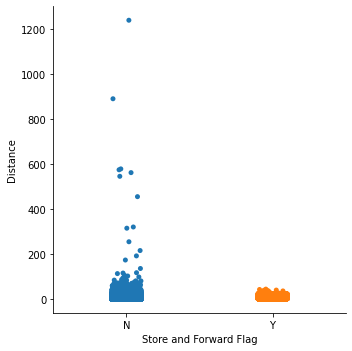

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(y='distance',x='store_and_fwd_flag',data=trip_df,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

# <B> OBSERVATION </B>
There are less than 1% of trips that were stored before forwarding.


In [ ]:
trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
0,id2875421,2,Evening,Evening,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,1.498523
1,id2377394,1,Late night,Late night,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,1.805510
2,id3858529,2,Morning,Afternoon,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,6.385108
3,id3504673,2,Evening,Evening,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,1.485501
4,id2181028,2,Afternoon,Afternoon,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,1.188590


In [ ]:
# Calculating the distance (KM) of Each trip
trip_df['distance'].value_counts()

0.000000    5897
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.917715       1
4.698058       1
4.920641       1
2.988820       1
1.134044       1
Name: distance, Length: 1452360, dtype: int64

In [ ]:
# Calculating speeed using trip_duration 
trip_df['speed'] = (trip_df.distance/(trip_df.trip_duration/3600))
trip_df['speed'].value_counts()

0.000000     5897
0.509011        5
0.152703        3
0.169670        3
0.190879        3
             ... 
8.733999        1
7.996145        1
5.057327        1
18.016528       1
20.618974       1
Name: speed, Length: 1452679, dtype: int64

In [ ]:
# checking largest 10 spped fom data
trip_df['speed'].nlargest(10)

1176337    9274.849833
910072     6877.350121
184925     5640.501953
974378     5251.023411
377068     4086.717794
1013474    1756.560183
923793     1440.604652
1001028    1410.026735
906281     1408.106827
595540     1351.743467
Name: speed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


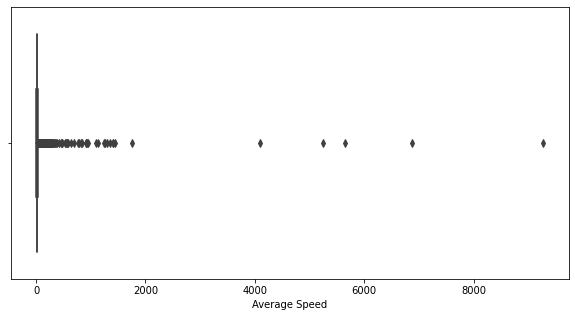

In [ ]:
# Graph of largest speed
plt.figure(figsize = (10,5))
sns.boxplot(trip_df.speed)
plt.xlabel('Average Speed')
plt.show()

# <B> OBSERVATION : </B>  5897 trips with 0 km distance </B>

The reasons for 0 km distance can be:

(A) The dropoff location couldn’t be tracked.

(B) The driver deliberately took this ride to complete a target ride number.

(C) The passengers canceled the trip.


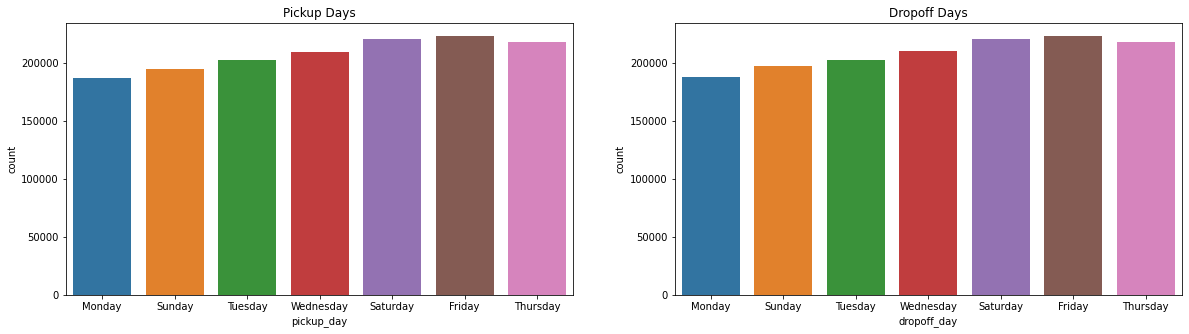

In [ ]:
# Checking Pickup and drop off day trip for each day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=trip_df,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=trip_df,ax=ax2)

# <B> OBSERVATION </B>
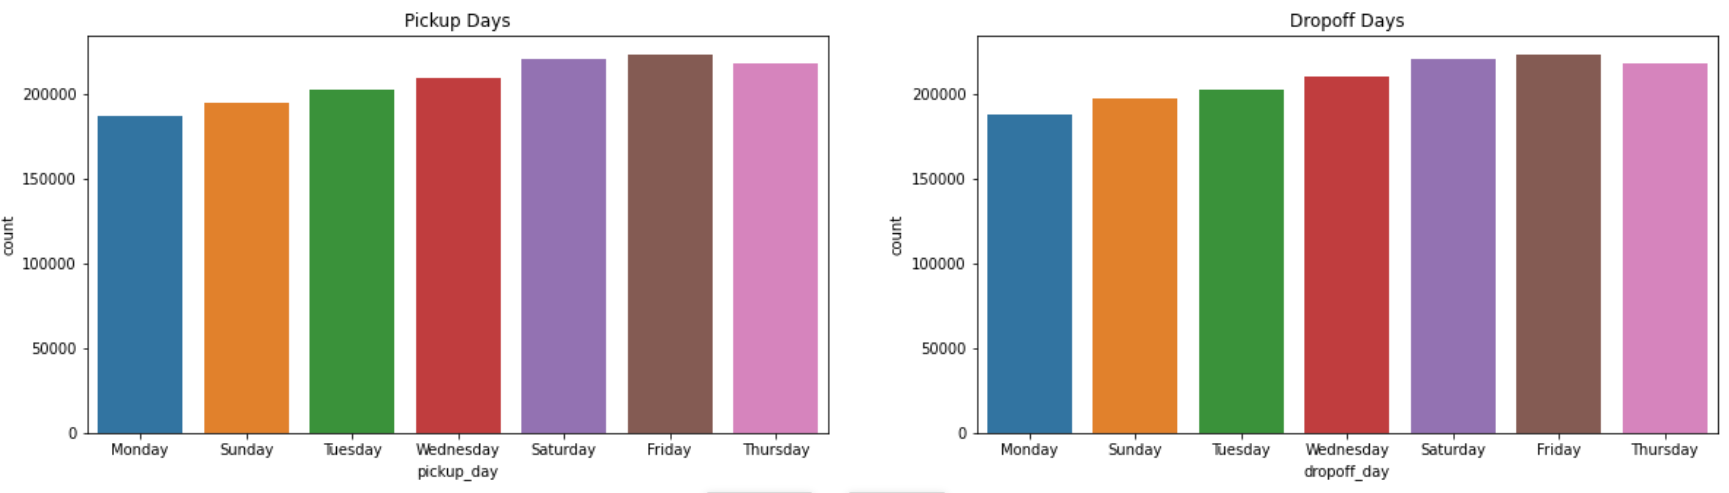
(A) Maximum no. of trips on Friday and Saturday in both graphs.

(B) Minimum No. of Trips on Monady in both graphs.

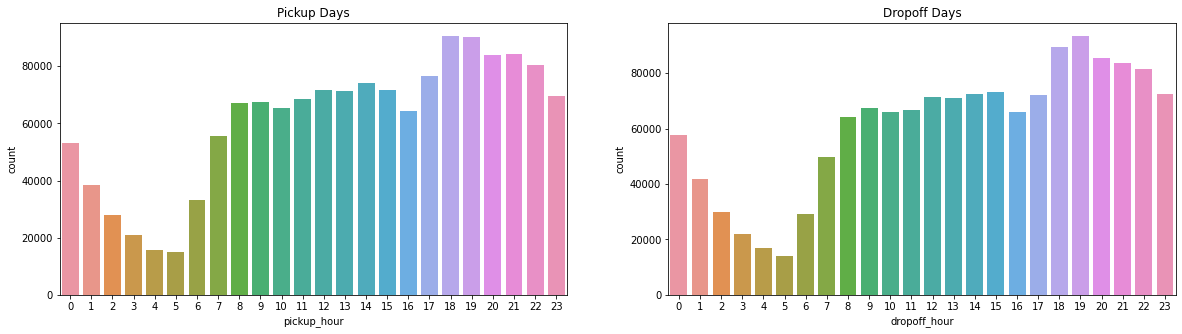

In [ ]:
# Trips per Hour in pickup_hour and dropoff_hour
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=trip_df,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=trip_df,ax=ax10)


# <B> OBSERVATION : </B> Busiest hour is 6:00 and 7:00

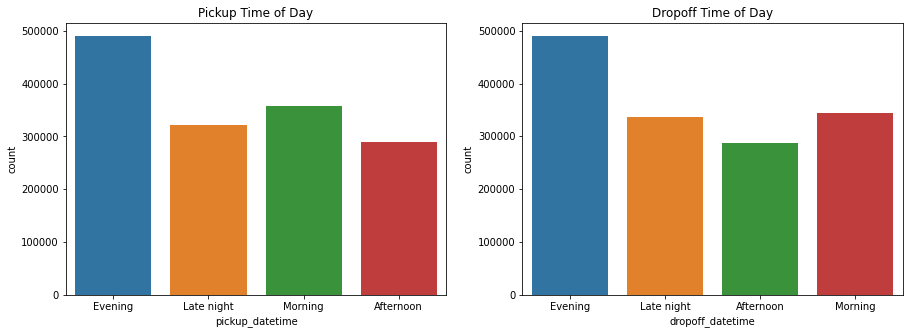

In [ ]:
# Trips per day in Time(Morning, Afternoon, Evening and Late night) 
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(15,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_datetime",data=trip_df,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_datetime",data=trip_df,ax=ax4)

# <B> OBSERVATION : </B> <h6> In both cases, Maximum pickup and drop time is in Evening

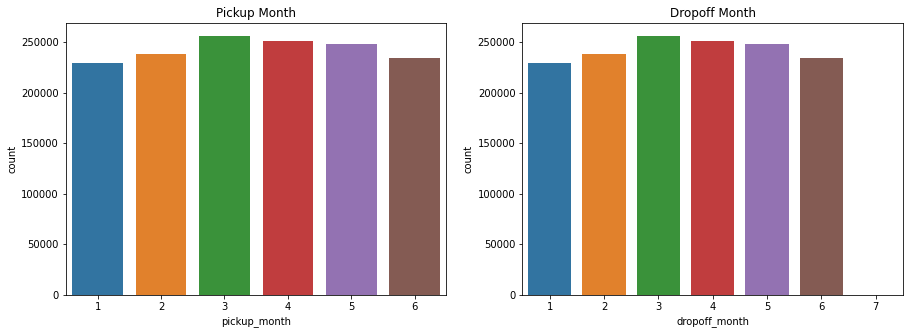

In [ ]:
# Trips per month
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(15,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=trip_df,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=trip_df,ax=ax12)

# <B> OBSERVATION :</B> <h6> In both cases, Month-3 having maximum

# <B> Bivariate Analysis </B> involves finding relationships, patterns, and correlations between two variables.



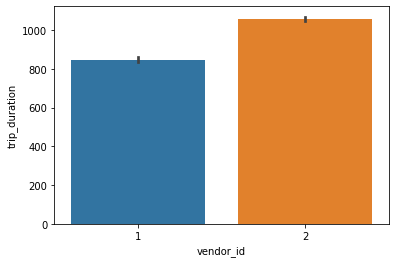

In [ ]:
# Trips duration in both vender 1 and vender 2
sns.barplot(y='trip_duration',x='vendor_id',data=trip_df,estimator=np.mean)

# <B> OBSERVATION : </B> Maximum trip duration in Vender-2

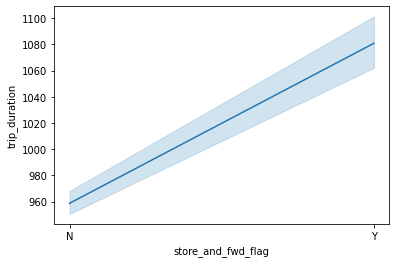

In [ ]:
# Trip Duration per Store and Forward Flag (On 2 unique values for store_and_fwd_flag i.e. Y and N)
sns.lineplot(y='trip_duration',x='store_and_fwd_flag',data=trip_df)

# <B> OBSERVATION : </B> <h6> Here, Continues incraese of trip duration in graph

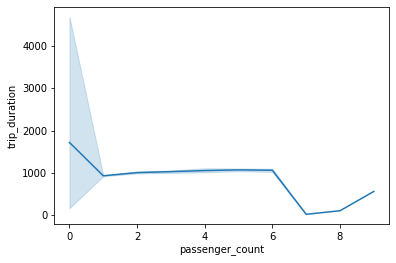

In [ ]:
# Trip duration per pessanger count
sns.lineplot(y='trip_duration',x='passenger_count',data=trip_df)

# <B> OBSERVATION : </B> <h6> maximum trip duration in Passenger Count =0

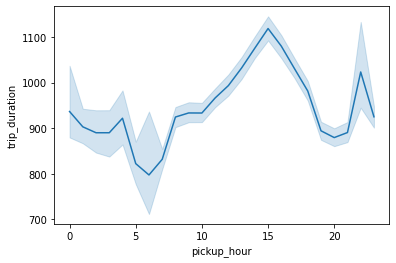

In [ ]:
# Trip duration per hour
sns.lineplot(x='pickup_hour',y='trip_duration',data=trip_df)

# <B> OBSERVATION : </B> <h6> Here, Variable trip duration in different pickup hour but maximum at 15.

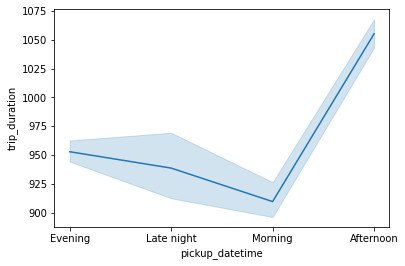

In [ ]:
# Trip duration per time of day
sns.lineplot(x='pickup_datetime',y='trip_duration',data=trip_df)

# <B> OBSERVATION : </B> <h6> Maximum trip duartion in Afternoon and minimum in Morning Time

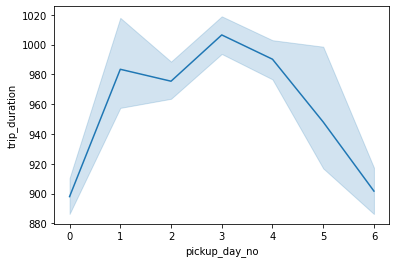

In [ ]:
# Trip duration per day in a week
sns.lineplot(x='pickup_day_no',y='trip_duration',data=trip_df)

# <B> OBSERVATION : </B> <h6> Maximum trip duration in Pickup day-3 while same trip duration in Pickup day 0 & 6

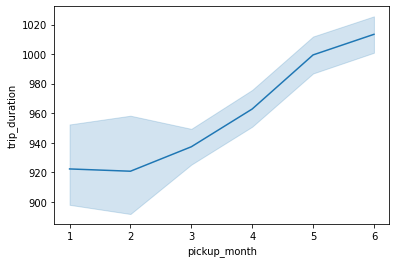

In [ ]:
# Trip duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=trip_df)

# <B> OBSERVATION : </B> <h6> Month-6 having maximum trip duration and minimum at Month-1

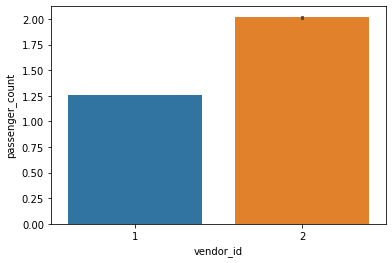

In [ ]:
# passesnger count in both vender
sns.barplot(y='passenger_count',x='vendor_id',data=trip_df)

# <B> OBSERVATION : </B> <h6>Vender-2 having more passenger than Vender-1

# We can see, trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.



In [ ]:
# Finding rows where distance = 0
trip_df[trip_df.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed
246,id3487442,2,Evening,Evening,1,-73.981819,40.768963,-73.981819,40.768963,N,...,Monday,Monday,0,0,18,18,2,2,0.0,0.0
291,id0924324,2,Evening,Evening,2,-73.959068,40.775661,-73.959068,40.775661,N,...,Tuesday,Tuesday,1,1,18,18,5,5,0.0,0.0
407,id1145809,2,Late night,Late night,6,-73.808487,40.687336,-73.808487,40.687336,N,...,Monday,Monday,0,0,23,23,5,5,0.0,0.0
702,id3499387,1,Evening,Evening,1,-73.786720,40.647041,-73.786720,40.647041,N,...,Monday,Monday,0,0,19,19,1,1,0.0,0.0
1620,id0753277,1,Late night,Late night,1,-74.209854,40.816853,-74.209854,40.816853,N,...,Wednesday,Wednesday,2,2,22,22,1,1,0.0,0.0


In [ ]:
trip_df[trip_df.distance==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed
1456399,id0618137,2,Morning,Morning,1,-73.978859,40.756721,-73.978859,40.756721,N,...,Wednesday,Wednesday,2,2,8,9,2,2,0.0,0.0
1456627,id1048767,2,Late night,Late night,1,-73.963554,40.768517,-73.963554,40.768517,N,...,Saturday,Saturday,5,5,22,22,2,2,0.0,0.0
1456989,id2595295,2,Morning,Morning,1,-73.984848,40.728222,-73.984848,40.728222,N,...,Saturday,Saturday,5,5,7,7,3,3,0.0,0.0
1457114,id0051314,2,Evening,Evening,1,-73.965981,40.770988,-73.965981,40.770988,N,...,Saturday,Saturday,5,5,20,20,4,4,0.0,0.0
1457136,id1907784,1,Evening,Evening,1,-73.966705,40.769783,-73.966705,40.769783,N,...,Friday,Friday,4,4,20,20,3,3,0.0,0.0


# <B> OBSERVATION : </B>

(A) We observed that distance is recorded as 0 but trip duration is definitely more.

(B) dropoff coordinates weren’t recorded.

(C) For short trip durations, maybe the passenger changed their mind set and cancelled the ride after some time.
 

In [ ]:
trip_df.isnull().mean()[trip_df.isnull().mean() > 0]

Series([], dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


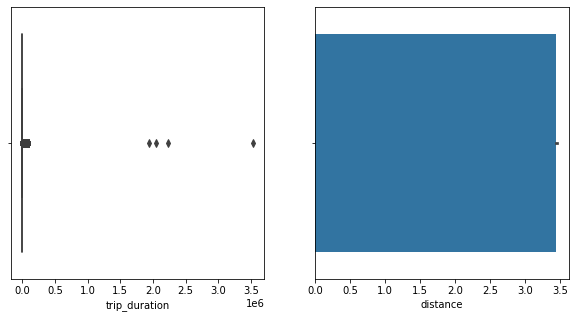

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(trip_df['trip_duration'], ax=axes[0])
sns.barplot(trip_df['distance'], ax=axes[1])

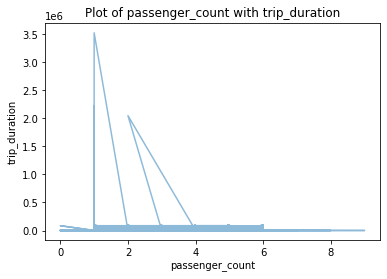

In [ ]:
# Look at relationship between passenger_count & trip_duration
plt.plot(trip_df['passenger_count'], trip_df['trip_duration'], alpha=0.5)
plt.title('Plot of passenger_count with trip_duration')
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')
plt.show()

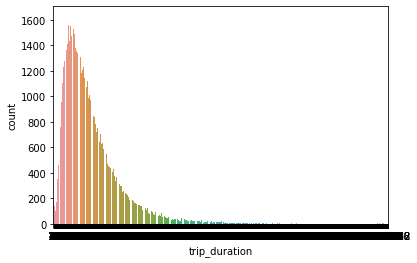

In [ ]:
# Moving towards Target varibale i.e trip_duration
sns.countplot(x='trip_duration',data=trip_df)

In [ ]:
# The value can be replaced by the mode or median of trip duration as well.
replace=trip_df[trip_df.trip_duration!=trip_df.trip_duration.max()]
print(replace)

                id  vendor_id pickup_datetime dropoff_datetime  \
0        id2875421          2         Evening          Evening   
1        id2377394          1      Late night       Late night   
2        id3858529          2         Morning        Afternoon   
3        id3504673          2         Evening          Evening   
4        id2181028          2       Afternoon        Afternoon   
...            ...        ...             ...              ...   
1458639  id2376096          2       Afternoon        Afternoon   
1458640  id1049543          1         Morning          Morning   
1458641  id2304944          2         Morning          Morning   
1458642  id2714485          1       Afternoon          Evening   
1458643  id1209952          1       Afternoon        Afternoon   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                 

In [ ]:
# The intervals are decided as follows:
# less than 5 hours
# 5–10 hours
# 10–15 hours
# 15–20 hours
# more than 20 hours
bins=np.array([0,1800,3600,5400,7200,90000])
trip_df['duration_time']=pd.cut(trip_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])
print(trip_df['duration_time'])

0           < 5
1           < 5
2          5-10
3           < 5
4           < 5
           ... 
1458639     < 5
1458640     < 5
1458641     < 5
1458642     < 5
1458643     < 5
Name: duration_time, Length: 1458644, dtype: category
Categories (5, object): ['< 5' < '5-10' < '10-15' < '15-20' < '>20']


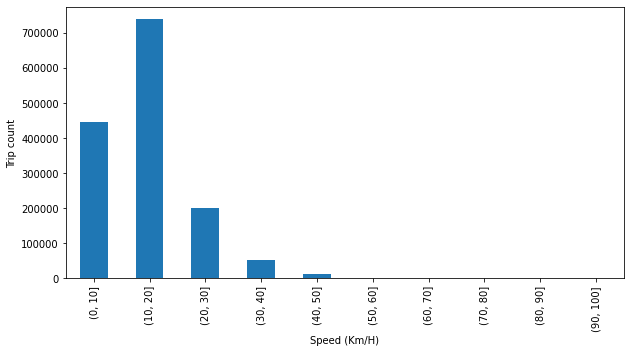

In [ ]:
plt.figure(figsize = (10,5))
trip_df.speed.groupby(pd.cut(trip_df.speed, np.arange(0,104,10))).count().plot(kind = 'bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

In [ ]:
trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed,duration_time
0,id2875421,2,Evening,Evening,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,1.498523,11.856445,< 5
1,id2377394,1,Late night,Late night,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,1.805510,9.803673,< 5
2,id3858529,2,Morning,Afternoon,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,11,12,1,1,6.385108,10.822216,5-10
3,id3504673,2,Evening,Evening,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,1.485501,12.465739,< 5
4,id2181028,2,Afternoon,Afternoon,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,1.188590,9.836608,< 5


In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   id                  1458644 non-null  object  
 1   vendor_id           1458644 non-null  int64   
 2   pickup_datetime     1458644 non-null  object  
 3   dropoff_datetime    1458644 non-null  object  
 4   passenger_count     1458644 non-null  int64   
 5   pickup_longitude    1458644 non-null  float64 
 6   pickup_latitude     1458644 non-null  float64 
 7   dropoff_longitude   1458644 non-null  float64 
 8   dropoff_latitude    1458644 non-null  float64 
 9   store_and_fwd_flag  1458644 non-null  object  
 10  trip_duration       1458644 non-null  int64   
 11  pickup_day          1458644 non-null  object  
 12  dropoff_day         1458644 non-null  object  
 13  pickup_day_no       1458644 non-null  int64   
 14  dropoff_day_no      1458644 non-null  int64   
 15

# <B> Correlation Analysis

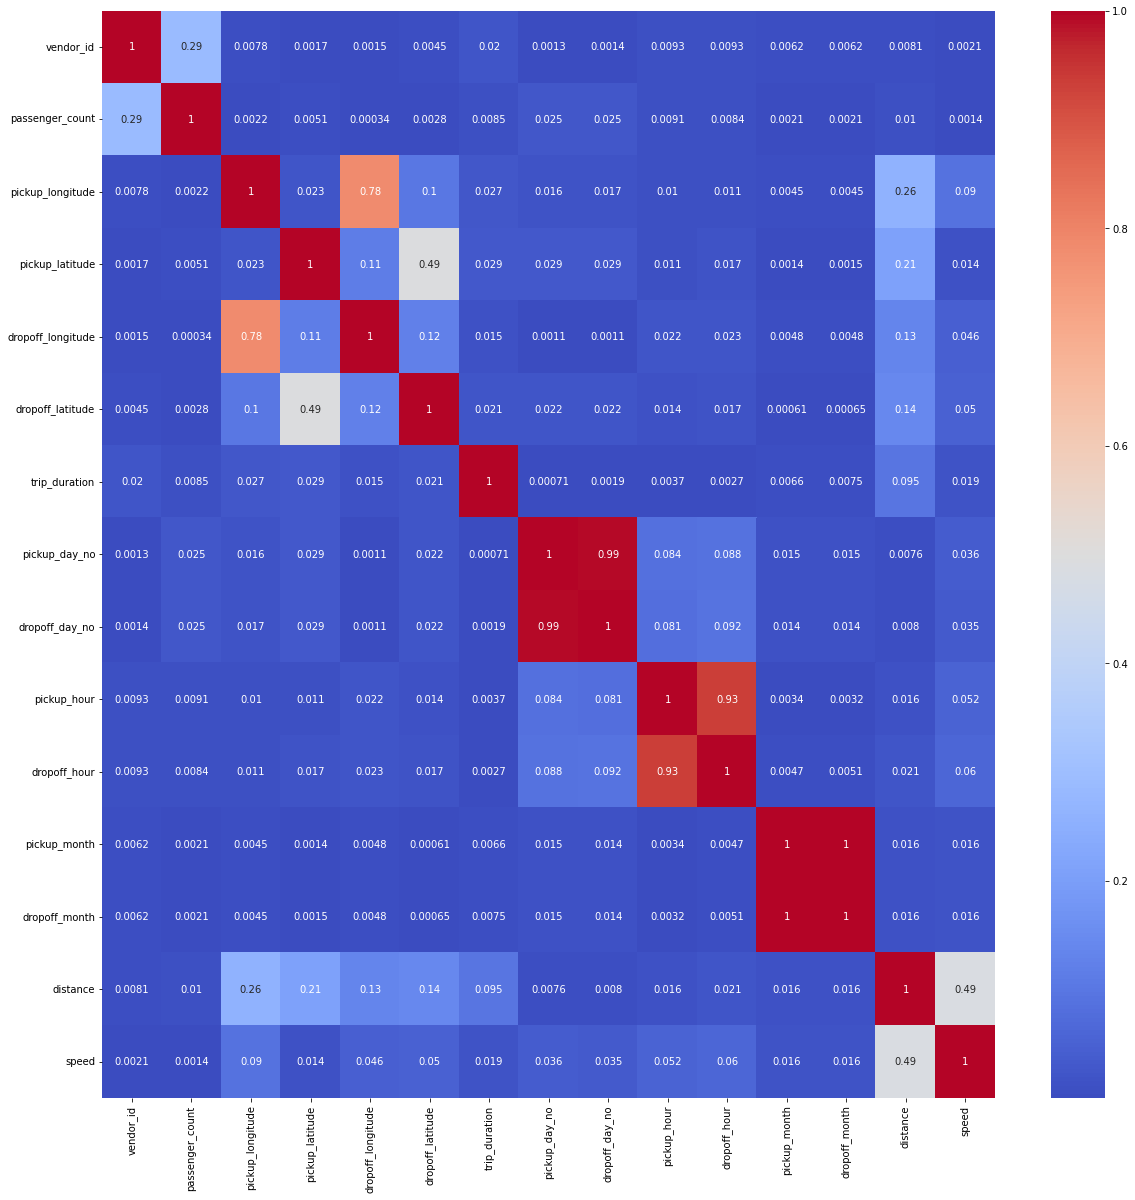

In [ ]:
plt.figure (figsize= (20,20))
corelation= trip_df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

# <B> OBSERVATION : </B> <h6>
(A) they do not affect the target varible i.e. trip_duration_hour much. Hece we should remove these features from our dataset.

(B) At the same time vendor_id doesn't affect much either so we can remove that as well.


In [ ]:
data=trip_df.drop(['vendor_id'], axis=1)

LET'S CHECK NUMERICAL VALUE or DATA

In [ ]:
numeric_features= trip_df.describe().columns

In [ ]:
features= numeric_features.copy()
features= list(features)
features= features[:-1]
print(list(features))
print(f'The length of features {len(features)}')

['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month', 'dropoff_month', 'distance']
The length of features 14


In [ ]:
from scipy.stats import zscore
X = trip_df[features].apply(zscore)[:]  

In [ ]:
 trip_df['trip_duration_hour']=trip_df['trip_duration']/3600
 y = np.log10(trip_df['trip_duration_hour'])[:]
 y

0         -0.898291
1         -0.734789
2         -0.229148
3         -0.923845
4         -0.917813
             ...   
1458639   -0.665323
1458640   -0.740061
1458641   -0.673209
1458642   -0.984594
1458643   -1.259637
Name: trip_duration_hour, Length: 1458644, dtype: float64

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1166915, 14) (291729, 14) (1166915,) (291729,)


In [ ]:
X_train[0:10]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
599669,-1.072524,-0.505637,0.032582,0.229661,0.016910,0.125872,-0.168497,-1.049301,-1.049997,-0.719798,-0.709304,-0.902311,-0.902429,-0.741422
1224682,0.932380,-0.505637,-0.270756,-1.124577,-0.183320,-0.822845,-0.122864,-0.537541,-0.538906,1.311550,1.295730,0.882302,0.881993,-0.552332
78001,-1.072524,-0.505637,-0.447659,-0.848231,-0.059661,0.730220,0.060432,-0.537541,-0.538906,1.155293,1.141497,1.477173,1.476800,0.721369
990137,-1.072524,-0.505637,-0.256767,0.114227,-0.119493,-0.149411,-0.097470,-1.561062,-1.561088,-0.876055,-0.863538,-0.902311,-0.902429,-0.513359
498353,0.932380,-0.505637,0.293955,0.654855,-0.046053,0.806428,-0.072267,-0.025780,-0.027814,0.999035,0.987263,-0.902311,-0.902429,-0.283434
165559,-1.072524,1.016153,-0.212972,0.395562,-0.199412,0.237367,-0.149977,-0.025780,-0.027814,0.061490,0.061863,-0.902311,-0.902429,-0.705068
1382058,-1.072524,-0.505637,0.319458,-0.829320,0.218868,-0.950921,-0.151504,-1.049301,-1.049997,1.311550,1.295730,1.477173,1.476800,-0.592382
950885,0.932380,1.777048,-0.168531,-0.732448,0.000386,-0.217966,-0.108162,-0.025780,-0.027814,1.311550,1.449963,0.287431,0.287186,-0.298288
595547,-1.072524,-0.505637,-0.292600,0.008189,-0.084825,0.839270,-0.069594,1.509502,1.505459,0.217747,0.370330,-0.307440,-0.307621,0.045897
1197820,0.932380,2.537943,-0.329401,-0.417004,0.209040,-0.798506,0.048403,0.997741,0.994368,-1.969858,-1.788938,-0.307440,-0.307621,0.031984


In [ ]:
X_test[0:10]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
571578,0.932380,-0.505637,0.022145,0.186156,-0.017650,0.050834,-0.161624,-0.025780,-0.027814,0.374005,0.370330,-0.307440,-0.307621,-0.697289
1280332,0.932380,0.255258,0.163538,0.612510,0.949913,4.367785,0.205732,-0.025780,-0.027814,1.155293,1.295730,0.287431,0.287186,2.920366
177838,-1.072524,1.016153,-0.519754,-1.193606,0.231720,0.719804,0.162581,-0.537541,-0.538906,-0.407283,-0.400838,-0.307440,-0.307621,1.200618
1433776,-1.072524,-0.505637,-0.457128,-0.329297,-0.267127,0.186987,0.003343,1.509502,1.505459,0.999035,0.987263,-0.307440,-0.307621,-0.254585
757662,-1.072524,-0.505637,-0.529977,-1.074227,-0.447593,-0.859089,-0.117900,-0.537541,-0.538906,-0.094768,-0.092371,0.287431,0.287186,-0.618440
737011,-1.072524,-0.505637,0.029139,0.007145,-0.198440,-0.816149,-0.014987,-1.049301,-1.049997,-0.407283,-0.246604,-0.307440,-0.307621,0.004341
402752,0.932380,3.298838,-0.231373,-0.502507,-0.084501,-0.672449,-0.066539,-1.049301,-1.049997,0.842778,0.987263,0.882302,0.881993,-0.531009
179791,0.932380,2.537943,-0.164980,-0.108521,-0.483017,-0.954322,-0.029307,-1.561062,-1.561088,-0.876055,-0.863538,-0.902311,-0.902429,0.086366
895734,-1.072524,-0.505637,-0.057268,0.253560,-0.310219,0.034784,-0.093460,-0.537541,-0.538906,-1.969858,-1.943172,0.882302,0.881993,-0.416941
821808,-1.072524,-0.505637,-0.423663,-0.260036,0.361967,1.750575,0.052604,-0.537541,-0.538906,-1.501086,-1.480471,-0.307440,-0.307621,1.364272


In [ ]:
y_train[0:10]

599669    -1.669812
1224682   -1.056615
78001     -0.450452
990137    -0.904056
498353    -0.792126
165559    -1.315753
1382058   -1.336194
950885    -0.961910
595547    -0.781786
1197820   -0.472442
Name: trip_duration_hour, dtype: float64

In [ ]:
y_test[0:10]

571578    -1.503224
1280332   -0.247311
177838    -0.298384
1433776   -0.566408
757662    -1.022276
737011    -0.611327
402752    -0.770261
179791    -0.649967
895734    -0.884205
821808    -0.464636
Name: trip_duration_hour, dtype: float64

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Running RFE with output number of the variable  equals to 13
lm =  LinearRegression()
rfe = RFE(lm, n_features_to_select=12)
rfe= rfe.fit(X_train, y_train)
#printing the boolean result
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

In [ ]:
#Assign the rfe features from X_train into col 
col= X_train.columns[rfe.support_]
col

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'distance'],
      dtype='object')

In [ ]:
#X_train_rfe is nothing but assigning remaining features after eliminating unimportant features from X_train
X_train_rfe= X_train[col]
X_train_rfe

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,dropoff_hour,pickup_month,dropoff_month,distance
599669,-0.505637,0.032582,0.229661,0.016910,0.125872,-0.168497,-1.049301,-1.049997,-0.709304,-0.902311,-0.902429,-0.741422
1224682,-0.505637,-0.270756,-1.124577,-0.183320,-0.822845,-0.122864,-0.537541,-0.538906,1.295730,0.882302,0.881993,-0.552332
78001,-0.505637,-0.447659,-0.848231,-0.059661,0.730220,0.060432,-0.537541,-0.538906,1.141497,1.477173,1.476800,0.721369
990137,-0.505637,-0.256767,0.114227,-0.119493,-0.149411,-0.097470,-1.561062,-1.561088,-0.863538,-0.902311,-0.902429,-0.513359
498353,-0.505637,0.293955,0.654855,-0.046053,0.806428,-0.072267,-0.025780,-0.027814,0.987263,-0.902311,-0.902429,-0.283434
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,-0.505637,1.418966,0.703465,0.685099,0.218448,-0.052792,-1.049301,-1.049997,1.295730,1.477173,1.476800,0.287067
152315,-0.505637,-0.171114,0.195785,-0.206216,0.145748,-0.156087,0.997741,0.994368,0.987263,-0.307440,-0.307621,-0.753710
963395,-0.505637,-0.291954,0.151003,-0.610888,-1.311021,0.006780,1.509502,1.505459,-0.400838,-1.497182,-1.497236,0.593567
117952,-0.505637,-0.123983,0.437444,-0.000802,0.167430,-0.026443,0.485981,0.483277,-0.863538,-0.307440,-0.307621,-0.541193


In [ ]:
import statsmodels.api as sm
#Adding a constant variable
X_train_rfe= sm.add_constant(X_train_rfe)
X_train_rfe

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,dropoff_hour,pickup_month,dropoff_month,distance
599669,1.0,-0.505637,0.032582,0.229661,0.016910,0.125872,-0.168497,-1.049301,-1.049997,-0.709304,-0.902311,-0.902429,-0.741422
1224682,1.0,-0.505637,-0.270756,-1.124577,-0.183320,-0.822845,-0.122864,-0.537541,-0.538906,1.295730,0.882302,0.881993,-0.552332
78001,1.0,-0.505637,-0.447659,-0.848231,-0.059661,0.730220,0.060432,-0.537541,-0.538906,1.141497,1.477173,1.476800,0.721369
990137,1.0,-0.505637,-0.256767,0.114227,-0.119493,-0.149411,-0.097470,-1.561062,-1.561088,-0.863538,-0.902311,-0.902429,-0.513359
498353,1.0,-0.505637,0.293955,0.654855,-0.046053,0.806428,-0.072267,-0.025780,-0.027814,0.987263,-0.902311,-0.902429,-0.283434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,1.0,-0.505637,1.418966,0.703465,0.685099,0.218448,-0.052792,-1.049301,-1.049997,1.295730,1.477173,1.476800,0.287067
152315,1.0,-0.505637,-0.171114,0.195785,-0.206216,0.145748,-0.156087,0.997741,0.994368,0.987263,-0.307440,-0.307621,-0.753710
963395,1.0,-0.505637,-0.291954,0.151003,-0.610888,-1.311021,0.006780,1.509502,1.505459,-0.400838,-1.497182,-1.497236,0.593567
117952,1.0,-0.505637,-0.123983,0.437444,-0.000802,0.167430,-0.026443,0.485981,0.483277,-0.863538,-0.307440,-0.307621,-0.541193


In [ ]:
# Now doing linear regression
lm= sm.OLS(y_train, X_train_rfe).fit()
lm

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     trip_duration_hour   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 6.692e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:06:52   Log-Likelihood:            -1.1670e+05
No. Observations:             1166915   AIC:                         2.334e+05
Df Residuals:                 1166902   BIC:                         2.336e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7488      0.00

# <B> MODEL PREDICTION </B>


In [ ]:
#Making prediction
y_pred_train= lm.predict(X_train_rfe)
X_test_rfe= X_test[col]

#Adding a constant variable
X_test_rfe= sm.add_constant(X_test_rfe)
print(f'The constant variable is {X_test_rfe}')

# prediction
y_pred_test= lm.predict(X_test_rfe)
print(f'The prdiction result is {y_pred_test}')

The constant variable is          const  passenger_count  pickup_longitude  pickup_latitude  \
571578     1.0        -0.505637          0.022145         0.186156   
1280332    1.0         0.255258          0.163538         0.612510   
177838     1.0         1.016153         -0.519754        -1.193606   
1433776    1.0        -0.505637         -0.457128        -0.329297   
757662     1.0        -0.505637         -0.529977        -1.074227   
...        ...              ...               ...              ...   
96875      1.0        -0.505637         -0.069965        -0.414568   
316240     1.0        -0.505637         -0.153036         0.116431   
1013475    1.0         0.255258          0.237785         0.615062   
631553     1.0         0.255258         -0.061787        -0.267345   
1250099    1.0         0.255258         -0.461540        -0.523622   

         dropoff_longitude  dropoff_latitude  trip_duration  pickup_day_no  \
571578           -0.017650          0.050834      -0.161

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# <B> Model Evaluation :</B>
<h6>
We will check how well our model is able to make prediction.


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train Mean Squred Error(MSE) :" , lr_train_mse)

lr_train_rmse = np.sqrt(lr_train_mse)

print("Train Root-MSE :" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train Mean Squred Error(MSE) : 0.07151409895498129
Train Root-MSE : 0.26742120139394576
Train R2 : 0.407653406631737
Train Adjusted R2 :  0.40764629989396406


In [ ]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = np.sqrt(lr_test_mse)

print("Test RMSE :" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 0.09468986206466719
Test RMSE : 0.3077171786960669
Test R2 : 0.21125474512562714
Test Adjusted R2 :  0.21121689149649636


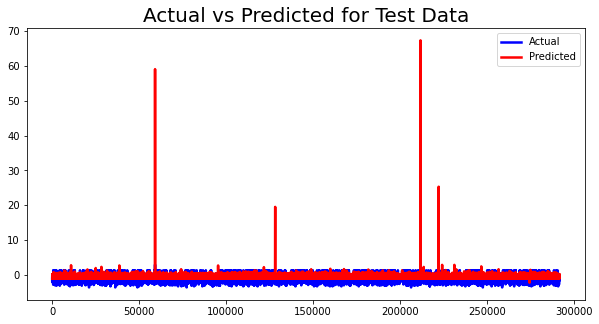

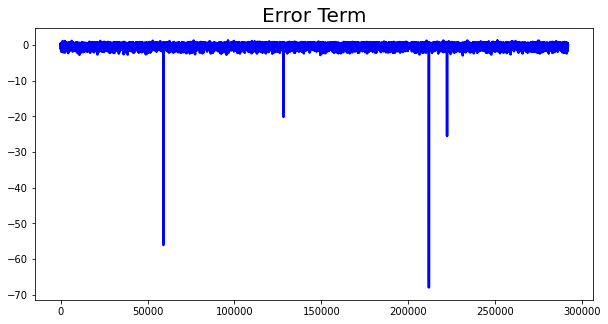

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# <B> OBSERVATION : </B> <h6>
As per data and graph, Linear regression model does not provide us with high accuracy. It has high prediction error on the metrics we tested.

<B> Now, Try Lasso Regression </B>
<h6>
In statistics and machine learning, lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation to enhance the accuracy
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+04, tolerance: 1.130e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e+04, tolerance: 1.125e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is : {'alpha': 0.001}
The R2 score using the same alpha is : 0.3882472449561142


In [ ]:
lasso_regressor.score(X_train, y_train)

0.40744147083988835

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_train

array([-0.93315776, -0.8415105 , -0.57772367, ..., -0.63702958,
       -0.88079817, -0.82142694])

In [ ]:
y_pred_lasso_test = lasso_regressor.predict(X_test)
y_pred_lasso_test

array([-0.90351609, -0.15773162, -0.51080661, ..., -0.78535793,
       -0.77208391, -0.84470766])

In [ ]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)
print("Train RMSE :" ,lasso_train_rmse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

Train MSE : 0.07153968599702737
Train RMSE : 0.2674690374548564
Train R2 : 0.40744147083988835
Train Adjusted R2 :  0.40744147083988835


In [ ]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)
print("Test RMSE :" ,lasso_test_rmse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

Test MSE : 0.09397249605563705
Test RMSE : 0.3065493370660538
Test R2 : 0.217230242642397
Test Adjusted R2 :  0.2171926757906072


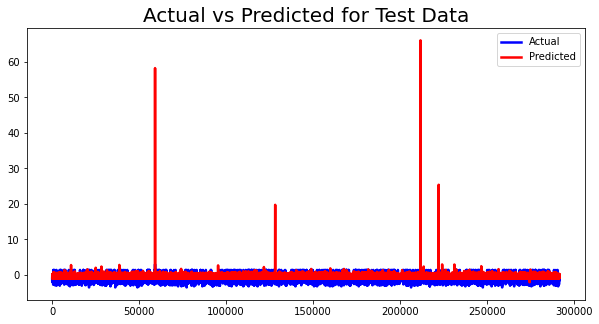

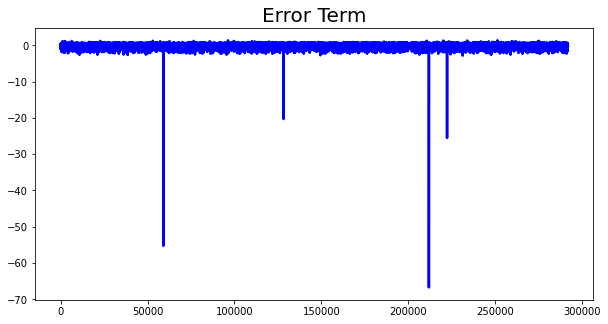

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_lasso_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# <B> Ridge regression </B> is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is : {'alpha': 100}
The R2 score using the same alpha is : 0.3882472449561142


In [ ]:
print(f'Ridge Regressor best estimator is : {ridge_regressor.best_estimator_}')

print(f'Ridge Regressor best score on X & Y train is : {ridge_regressor.score(X_train, y_train)}')

y_pred_ridge_train=ridge_regressor.predict(X_train)
print(f'Ridge Regressor train prediction is : {y_pred_ridge_train}')

y_pred_ridge_test = ridge_regressor.predict(X_test)
print(f'Ridge Regressor test prediction is : {y_pred_ridge_test}')

Ridge Regressor best estimator is : Ridge(alpha=100)
Ridge Regressor best score on X & Y train is : 0.4076977475335445
Ridge Regressor train prediction is : [-0.93662407 -0.84018576 -0.57563723 ... -0.63862015 -0.88354744
 -0.82048556]
Ridge Regressor test prediction is : [-0.90455168 -0.15200022 -0.50882482 ... -0.78399927 -0.77193109
 -0.84574934]


In [ ]:
#Evaluating Ridge Regression
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = np.sqrt(ridge_train_mse)
print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 0.07150874567081436
Train RMSE : 0.2674111921195789
Train R2 : 0.4076977475335445
Train Adjusted R2 :  0.4076977475335445


In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = np.sqrt(ridge_test_mse)
print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 0.0946618350686294
Test RMSE : 0.30767163513822554
Test R2 : 0.21148820369923982
Test Adjusted R2 :  0.21145036127430228


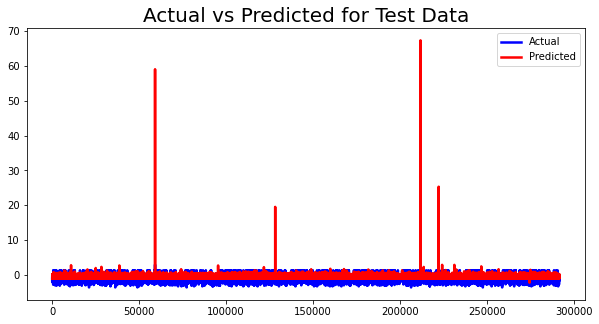

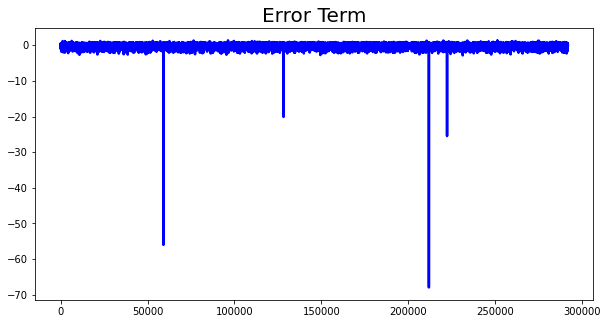

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_ridge_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# <B> Decision Tree Regressor </B> is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(f' The Hyperparameter grid is {param_dict_dt}')

#the cache variables contains the best parameters for the Decision Tree that we already tested before to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}
print(f'The Cavhe variable for best parameter of DTR is {cache}')

 The Hyperparameter grid is {'max_depth': [4, 6, 8, 10], 'min_samples_split': [10, 20, 30], 'min_samples_leaf': [8, 16, 22]}
The Cavhe variable for best parameter of DTR is {'max_depth': [10], 'min_samples_split': [10], 'min_samples_leaf': [22]}


In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  11.2s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  11.2s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  11.5s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [ ]:
print(f' The DTR grid best score is {dt_grid.best_score_}')
print(f' The DTR grid best estimator is {dt_grid.best_estimator_}')

y_pred_dt_train=dt_grid.predict(X_train)
print(f' The DTR train prediction is {y_pred_dt_train}')

y_pred_dt_test=dt_grid.predict(X_test)
print(f' The DTR test prediction is {y_pred_dt_test}')

 The DTR grid best score is 0.9999401269283922
 The DTR grid best estimator is DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)
 The DTR train prediction is [-1.67282285 -1.05661542 -0.4499485  ... -0.55804132 -0.64168999
 -0.96859154]
 The DTR test prediction is [-1.50322406 -0.24584485 -0.29744392 ... -0.82230321 -0.57132245
 -0.77204189]


In [ ]:
dt_train_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_train_mse)

dt_train_rmse = np.sqrt(dt_train_mse)
print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_train_r2)

dt_train_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_r2_)

Train MSE : 5.24770694950388e-06
Train RMSE : 0.002290787408186076
Train R2 : 0.9999565335873631
Train Adjusted R2 :  0.9999565330658705


In [ ]:
dt_test_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_test_mse)
dt_test_rmse = np.sqrt(dt_test_mse)
print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

Test MSE : 8.734121055849965e-06
Test RMSE : 0.00295535464129941
Test R2 : 0.9999272467359431
Test Adjusted R2 :  0.9999272432443531


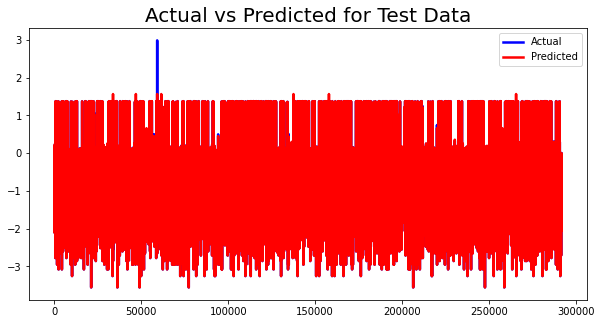

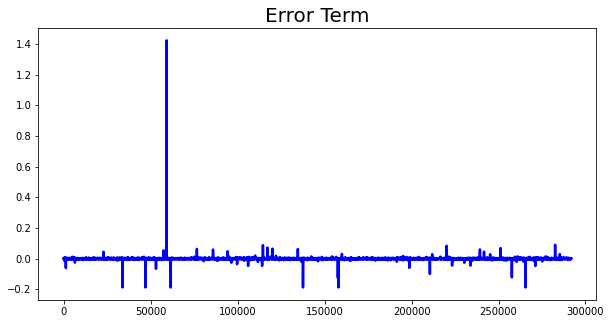

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# <B> EVALUATING ALL MOEDL </B>

In [ ]:
# Model summary of Train data of different model
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse]
print(f'Mean Square error Train of all model : {train_mse}')

train_rmse= [lr_train_rmse, lasso_train_rmse, ridge_train_rmse, dt_train_rmse]
print(f'Root MSE train of all model : {train_rmse}')

train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2]
print(f'r2 train of all model : {train_r2}')

train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2, dt_train_r2]
print(f'r2 adjusted tarin of all model : {train_adjusted_r2}')

Mean Square error Train of all model : [0.07151409895498129, 0.07153968599702737, 0.07150874567081436, 5.24770694950388e-06]
Root MSE train of all model : [0.26742120139394576, 0.2674690374548564, 0.2674111921195789, 0.002290787408186076]
r2 train of all model : [0.407653406631737, 0.40744147083988835, 0.4076977475335445, 0.9999565335873631]
r2 adjusted tarin of all model : [0.40764629989396406, 0.4074343615593945, 0.4076977475335445, 0.9999565335873631]


In [ ]:
# Model summary of Test data of different model
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse]
print(f'Mean Square error Test of all model : {test_mse}')

test_rmse= [lr_test_rmse, lasso_test_rmse, ridge_test_rmse, dt_test_rmse]
print(f'Root MSE test of all model : {test_rmse}')

test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2]
print(f'r2 test of all model : {test_r2}')

test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, dt_train_r2]
print(f'r2 adjusted test of all model : {test_adjusted_r2}')

Mean Square error Test of all model : [0.09468986206466719, 0.09397249605563705, 0.0946618350686294, 8.734121055849965e-06]
Root MSE test of all model : [0.3077171786960669, 0.3065493370660538, 0.30767163513822554, 0.00295535464129941]
r2 test of all model : [0.21125474512562714, 0.217230242642397, 0.21148820369923982, 0.9999272467359431]
r2 adjusted test of all model : [0.21121689149649636, 0.2171926757906072, 0.21145036127430228, 0.9999565335873631]


In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R^2': train_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,0.071514,0.267421,0.407653,0.407646
1,Lasso Regression,0.071540,0.267469,0.407441,0.407434
2,Ridge Regression,0.071509,0.267411,0.407698,0.407698
3,DecisionTree Regressor,0.000005,0.002291,0.999957,0.999957


In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R^2': test_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,0.094690,0.307717,0.211255,0.211217
1,Lasso Regression,0.093972,0.306549,0.217230,0.217193
2,Ridge Regression,0.094662,0.307672,0.211488,0.211450
3,DecisionTree Regressor,0.000009,0.002955,0.999927,0.999957


# <B> <center> Conclusion </B>
(A) MSE and RMSE which are the metrics used to evaluate the performance of <b> regression model of Decision Tree </B> is not varying much during traing and testing time. Also the R^2 is about same during training and Testing time.

(B) The Linear models don't show good performance on our training and testing environment.

(C) From above table we can conclude that <B>Decision Tree Regressor </B> is the best models as compare to the other models to predict the trip duration for a particular taxi.